In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
from sklearn.datasets import make_regression

from sklearn import metrics
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [3]:
df = pd.read_json(r"data_harvest_clean.json", dtype={'code_postal': 'str'})
df.head()

,marque,modele,date_fabrication,kilometrage,carrosserie,code_postal,energie,emission,consommation,transmission,portes,sieges,cv_fiscaux,cv_reels,prix_vente
0,dacia,duster,2019,18300,4x4,86130,essence,0,0.0,manuelle,4,5,7,130,17600
1,mini,cooper,2018,47500,berline,59240,essence,119,0.0,automatique,2,4,10,192,24990
2,nissan,qashqai,2013,166400,break,53000,diesel,129,0.0,manuelle,4,5,6,110,8490
3,nissan,qashqai,2016,61500,4x4,1300,diesel,128,4.9,automatique,4,5,7,130,16900
4,mini,cooper,2018,58529,berline,30200,diesel,99,0.0,manuelle,4,5,5,95,17900


In [4]:
# df['consommation'].mask(df['consommation']==0.0,5.5,inplace=True)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


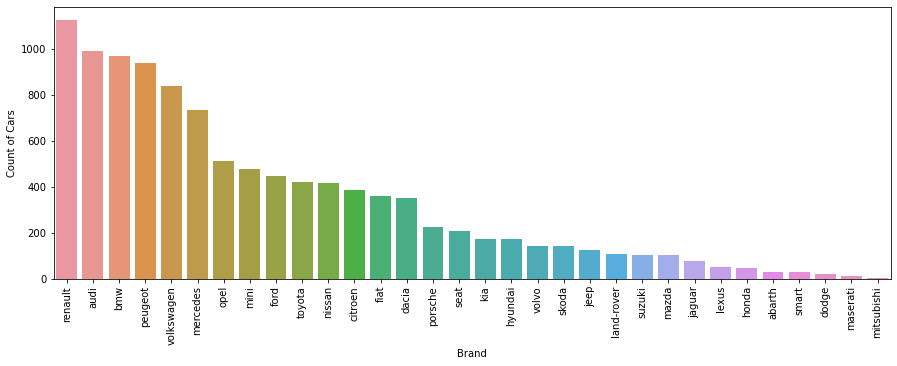

<Figure size 842.4x595.44 with 0 Axes>

In [5]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['marque'], order=pd.value_counts(df['marque']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

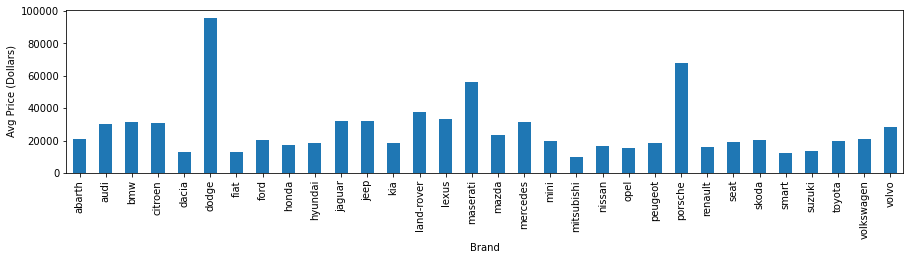

In [6]:
df_comp_avg_price = df[['marque','prix_vente']].groupby("marque", as_index = False).mean().rename(columns={'prix_vente':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'marque', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

In [7]:
df.head()

,marque,modele,date_fabrication,kilometrage,carrosserie,code_postal,energie,emission,consommation,transmission,portes,sieges,cv_fiscaux,cv_reels,prix_vente
0,dacia,duster,2019,18300,4x4,86130,essence,0,0.0,manuelle,4,5,7,130,17600
1,mini,cooper,2018,47500,berline,59240,essence,119,0.0,automatique,2,4,10,192,24990
2,nissan,qashqai,2013,166400,break,53000,diesel,129,0.0,manuelle,4,5,6,110,8490
3,nissan,qashqai,2016,61500,4x4,1300,diesel,128,4.9,automatique,4,5,7,130,16900
4,mini,cooper,2018,58529,berline,30200,diesel,99,0.0,manuelle,4,5,5,95,17900


In [8]:
df.dtypes

marque               object
modele               object
date_fabrication      int64
kilometrage           int64
carrosserie          object
code_postal          object
energie              object
emission              int64
consommation        float64
transmission         object
portes                int64
sieges                int64
cv_fiscaux            int64
cv_reels              int64
prix_vente            int64
dtype: object

<AxesSubplot:>

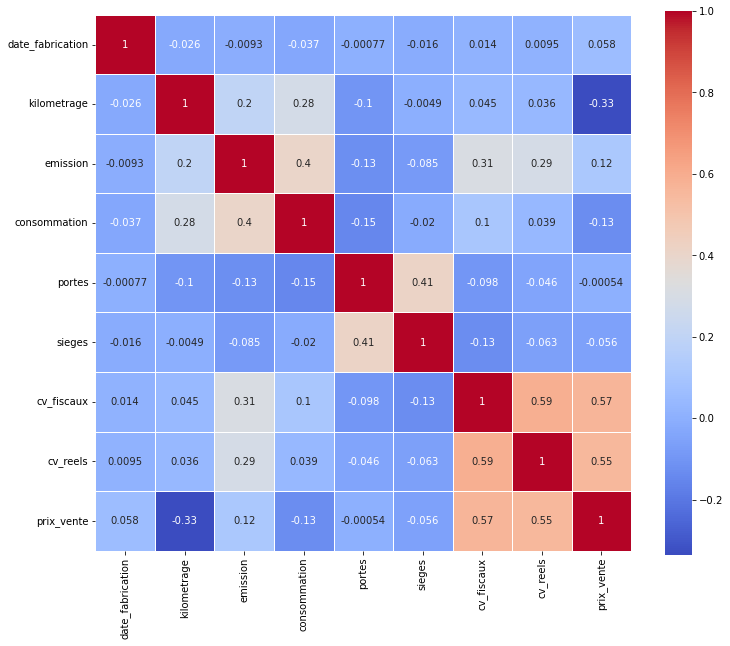

In [9]:
cor = df.corr() 

plt.subplots(figsize=(12,10))
sns.heatmap(cor, 
            square = True, 
            cmap="coolwarm",
            linewidths=0.5,
            annot=True )

In [10]:
df['transmission'].value_counts(normalize=True)

manuelle            0.534016
automatique         0.412936
semi automatique    0.051745
autres              0.001303
Name: transmission, dtype: float64

In [11]:

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X

,marque,modele,date_fabrication,kilometrage,carrosserie,code_postal,energie,emission,consommation,transmission,portes,sieges,cv_fiscaux,cv_reels
0,dacia,duster,2019,18300,4x4,86130,essence,0,0.0,manuelle,4,5,7,130
1,mini,cooper,2018,47500,berline,59240,essence,119,0.0,automatique,2,4,10,192
2,nissan,qashqai,2013,166400,break,53000,diesel,129,0.0,manuelle,4,5,6,110
3,nissan,qashqai,2016,61500,4x4,1300,diesel,128,4.9,automatique,4,5,7,130
4,mini,cooper,2018,58529,berline,30200,diesel,99,0.0,manuelle,4,5,5,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,mini,cooper,2018,22126,break,26000,essence,131,0.0,manuelle,4,5,6,102
10741,peugeot,206,2011,23341,berline,59310,essence,0,0.0,manuelle,4,5,0,0
10742,peugeot,206,2006,2770003,berline,56120,diesel,171,4.8,manuelle,4,5,6,110
10743,peugeot,206,2009,48000,berline,27130,essence,135,5.7,manuelle,4,5,4,60


In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.iloc[:,:-1]
y = df.iloc[:,-1]


cat_var = ['marque','modele','energie','transmission','code_postal']

categorielle_encoder = OneHotEncoder(handle_unknown='ignore',drop="first")


#enc_df = pd.DataFrame(categorielle_encoder.transform(categorielle).toarray())
ct = ColumnTransformer(transformers=[("cat",categorielle_encoder,cat_var)])
enc_df = ct.fit_transform(X).toarray()
# pour le récupérer en pickel il faut l'entrainer 
# preprocessing = ColumnTransformer(
# [
#         ("cat", categorielle_encoder, categorielle)
#     ]
# )

# exemple pipeline 

#pipeline = Pipeline(steps=[("preproc", categorielle_encoder),("model",DecisionTreeRegressor())])

# pour récupérer le preprocessing 
# pipeline["preproc"]
# pour entrainer la pipeline 
# pipeline.fit(X,y)


In [35]:
enc_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
#X, y = df(n_samples=3000, n_features=9)
# print(X[0:2])
# print(y[0:2])


print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(enc_df, y, test_size=0.20, random_state=42,stratify=df['marque'])





(10745, 14) (10745,)


In [37]:
set_config(print_changed_only=False) 

# dtr = DecisionTreeRegressor()
# print(dtr)

dtr = DecisionTreeRegressor(criterion='squared_error', min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best') 

In [38]:
dtr.fit(X_train, y_train)

score = dtr.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9367256999787447


In [39]:
y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  132738933.07374689
RMSE:  11521.238348100733


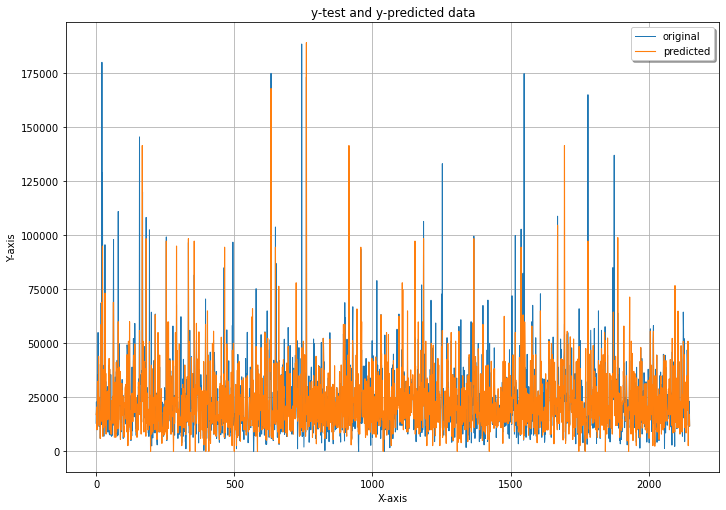

In [40]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Text(0, 0.5, 'y_pred')

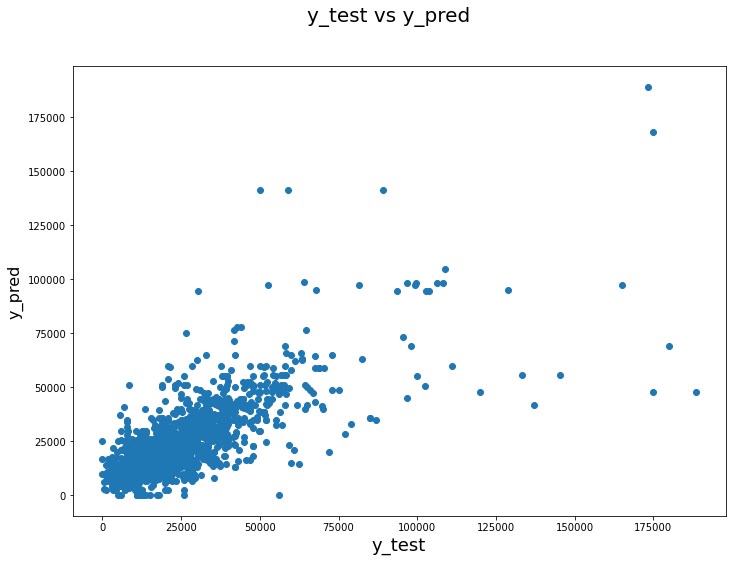

In [46]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [41]:
from sklearn.pipeline import make_pipeline
model1 = make_pipeline(ColumnTransformer(transformers=[("cat",categorielle_encoder,cat_var)]),DecisionTreeRegressor(criterion='squared_error', min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best')) 
model1[0].fit(X)
model1[1].fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=42, splitter='best')

In [42]:
model1[1].predict(X_test)==y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [43]:
model1

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['marque', 'modele',
                                                   'energie', 'transmission',
                                                   'code_postal'])],
                                   verbose=False,
        

In [44]:
from joblib import dump

# dump the pipeline model
dump(model1, filename="tree.joblib")

['tree.joblib']

In [45]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

regr =  SVR(kernel="poly",degree=1540,C=2000.0, epsilon=10.0)
regr.fit(X_train, y_train)

SVR(C=2000.0, cache_size=200, coef0=0.0, degree=1540, epsilon=10.0,
    gamma='scale', kernel='poly', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
regr.score(X_test,y_test)

0.2823321723815083

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
 
def linear_perf(true_set,pred_set,train_set):
    """Function print les differentes metrique relative à la régression linéaire 
    """
    mae=mean_absolute_error(true_set,pred_set)
    mse=mean_squared_error(true_set,pred_set)
    rmse=sqrt(mse)
    R=r2_score(true_set,pred_set,multioutput='variance_weighted')
    adjust_r=1-(1-R)*(y_test.shape[0]-1)/(y_test.shape[0]-train_set.shape[1]-1)
    print(f"mae={mae} \nmse={mse} \nrmse={rmse} \nr²={R} \nadjust r²={adjust_r} ")

In [26]:
linear_perf(y_test,regr.predict(X_test),X_train)

mae=8859.26217186038 
mse=224502546.2940679 
rmse=14983.40903446435 
r²=0.2823321723815083 
adjust r²=-1.5354448909942762 


In [27]:
linear_perf(y_test,y_pred,X_train)

mae=6224.9566275282305 
mse=125250810.04209787 
rmse=11191.550832753157 
r²=0.5996104354530258 
adjust r²=-0.41453418527450747 


In [28]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=200)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [29]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [32]:
modeltest = LinearRegression()
modeltest.fit(X_train_fs.toarray(), y_train)
newsvr=SVR(kernel="poly",gamma="scale",degree=50)
newsvr.fit(X_train_fs,y_train)
# evaluate the model
yhat = modeltest.predict(X_test_fs)
ysvr_pred=newsvr.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

linear_perf(y_test,yhat,X_train_fs.toarray())
print("\n")
linear_perf(y_test,ysvr_pred,X_train_fs.toarray())

MAE: 6314.512
mae=6314.512397958051 
mse=99890247.2429861 
rmse=9994.510855614 
r²=0.6806806073137082 
adjust r²=0.6478962754157316 


mae=11099.939087947883 
mse=326432671.3885016 
rmse=18067.447838267075 
r²=-0.0435081027198001 
adjust r²=-0.15064445823518002 


Feature 0: 0.735954
Feature 1: 132.058162
Feature 2: 185.232066
Feature 3: 67.062295
Feature 4: 112.854810
Feature 5: 318.213778
Feature 6: 119.759550
Feature 7: 13.251010
Feature 8: 4.838017
Feature 9: 9.306696
Feature 10: 14.546413
Feature 11: 12.339938
Feature 12: 11.589051
Feature 13: 57.467035
Feature 14: 17.002635
Feature 15: 41.135885
Feature 16: 0.015814
Feature 17: 139.980875
Feature 18: 18.054441
Feature 19: 2.457436
Feature 20: 60.905622
Feature 21: 95.931801
Feature 22: 64.227873
Feature 23: 1491.002411
Feature 24: 203.527577
Feature 25: 10.543594
Feature 26: 4.731581
Feature 27: 11.876249
Feature 28: 29.587516
Feature 29: 17.147116
Feature 30: 14.906605
Feature 31: 13.370320
Feature 32: 12.030518
Feature 33: 5.276129
Feature 34: 21.544223
Feature 35: 41.972269
Feature 36: 0.442983
Feature 37: 13.744163
Feature 38: 6.585758
Feature 39: 55.246714
Feature 40: 5.712661
Feature 41: 0.400435
Feature 42: 0.054648
Feature 43: 1.250011
Feature 44: 0.184580
Feature 45: 1292.754501
F

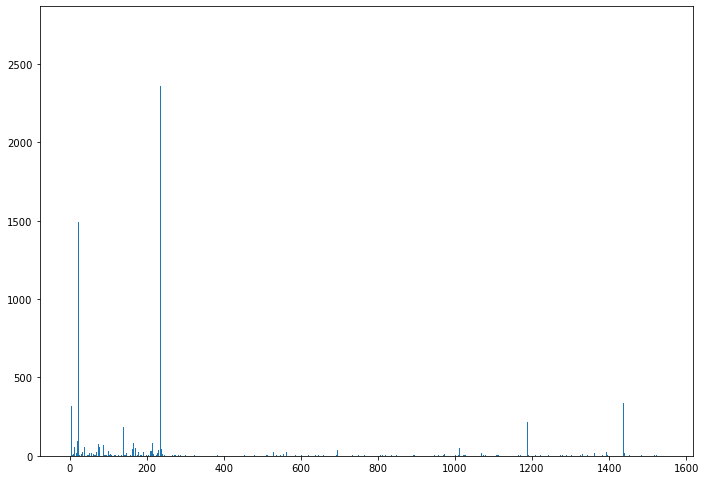

In [31]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()